# Class Puzzle

In [1]:
class Puzzle: 

  def __init__(self, file):
    with open(file, "r") as f:
        self.pieces = [line.split() for line in f]
    #Convert str to int
    for piece in self.pieces:
      for i in range(len(piece)):
        piece[i] = int(piece[i])
    self.rows, self.columns = self.pieces.pop(0)
    self.categorize()
    self.build()
    self.match()
    
  def categorize(self):
    self.corners, self.edges, self.others = [], [], []
    for piece in self.pieces:
      count = 0
      for i in range(len(piece)):
        if piece[i] == 0:
          count += 1
      if count == 2:
        self.corners.append(piece)
      elif count == 1:
        self.edges.append(piece)
      else:
        self.others.append(piece)

  def rotate(self, piece, angle):
    rotated_piece = []
    for i in range(angle, len(piece)+angle):
      if i%(len(piece)) == 0:
        rotated_piece.append(piece[0])
      elif i%(len(piece)) == 1:
        rotated_piece.append(piece[1])
      elif i%(len(piece)) == 2:
        rotated_piece.append(piece[2])
      elif i%(len(piece)) == 3:
        rotated_piece.append(piece[3])
    return rotated_piece

  def correct(self, piece, row, column):
    angle = 0
    if row == 0:
      if column == 0:  #top left
        while (piece[1] != 0) or (piece[2] != 0):
          angle += 1
          piece = self.rotate(piece, 1)
      elif column == self.columns-1:  #top right
        while (piece[2] != 0) or (piece[3] != 0):
          angle += 1
          piece = self.rotate(piece, 1)
      else: #top edges
        while piece[2] != 0:
          angle += 1
          piece = self.rotate(piece, 1)
    elif row == self.rows-1:
      if column == 0:  #bottom left
        while (piece[0] != 0) or (piece[1] != 0):
          angle += 1
          piece = self.rotate(piece, 1)
      elif column == self.columns-1:  #bottom right
        while (piece[0] != 0) or (piece[3] != 0):
          angle += 1
          piece = self.rotate(piece, 1)
      else: #bottom edges
        while piece[0] != 0:
          angle += 1
          piece = self.rotate(piece, 1)
    else:
      if column == 0: #left edges
        while piece[1] != 0:
          angle += 1
          piece = self.rotate(piece, 1)
      elif column == self.columns-1: #right edges
        while piece[3] != 0:
          angle += 1
          piece = self.rotate(piece, 1)
    #Add the index of the piece
    initial_piece = self.rotate(piece, len(piece)-angle)
    piece_idx = self.pieces.index(initial_piece)
    return ((piece_idx, angle), piece)

  def build(self):
    self.puzzle = []
    for i in range (self.rows):
      sub_puzzle = []
      for j in range (self.columns):
        if (i == 0 or i == self.rows-1):
          if (j == 0 or j == self.columns-1):
            sub_puzzle.append(self.correct(self.corners.pop(random.randint(0, len(self.corners)-1)), i, j))
          else:
            sub_puzzle.append(self.correct(self.edges.pop(random.randint(0, len(self.edges)-1)), i, j))
        elif (j == 0 or j == self.columns-1):
          sub_puzzle.append(self.correct(self.edges.pop(random.randint(0, len(self.edges)-1)), i, j))
        else:
          sub_puzzle.append(self.correct(self.others.pop(random.randint(0, len(self.others)-1)), i, j))
      self.puzzle.append(sub_puzzle)

  def match(self):
    self.score = 0
    for i in range (len(self.puzzle)):
      for j in range (len(self.puzzle[i])-1):
        #print(puzzle[i][j][1], puzzle[i][j+1][1], (puzzle[i][j][1][3], puzzle[i][j+1][1][1]))
        if self.puzzle[i][j][1][3] == self.puzzle[i][j+1][1][1]:
          self.score += 1
    #print()
    for i in range (len(self.puzzle)-1):
      for j in range (len(self.puzzle[i])):
        #print(puzzle[i][j][1], puzzle[i+1][j][1], (puzzle[i][j][1][0], puzzle[i+1][j][1][2]))
        if self.puzzle[i][j][1][0] == self.puzzle[i+1][j][1][2]:
          self.score += 1

J'avais commencé à implémenter une classe Puzzle mais finalement, je n'en ai pas eu besoin.

# Présentation du jeu et Paramètres

Le puzzle Eternity est un jeu de type casse-tête. \
Dans sa version originale, il est constitué de 256 pièces qu'il faut placer sur une grille de taille 16x16. \
Ces pièces comportent 4 chiffres, qu'il faut faire correspondre avec ceux des voisines. \
Cette règle, associée au nombre de pièces, rend encore plus grand le nombre de configurations possibles du puzzle, d'où sa complexe résolution. \
Pour l'anecdote, la première solution a été proposée par 2 étudiants en mathématiques après 5 mois de travail et de recherche !

In [31]:
#Importation des librairies nécessaires

import numpy as np
import random
import matplotlib.pyplot as plt
import copy

#Pour utiliser le programme:
#Dans puzzle_file: saisissez le nom du fichier du puzzle que vous souhaitez, de la même manière qu'illustré.
#itr représente le nombre d'itérations (il s'agit de mon critère de fin): saisissez le chiffre que vous souhaitez
#Lancez le programme ("Run" dans Visual Code Studio)


#Paramètres
puzzle_file = "pieces_set/pieces_10x10.txt"
itr = 100000

# Construction du puzzle

In [32]:
def features(file):
  with open(file, "r") as f:
      pieces = [line.split() for line in f]
  #Convert str to int
  for piece in pieces:
    for i in range(len(piece)):
      piece[i] = int(piece[i])
  rows, columns = pieces.pop(0)
  return (rows, columns, pieces)

La méthode "features" lit le fichier contenant les caractéristiques du puzzle (lignes, colonnes et pièces) qu'elle renvoie.

In [33]:
puzzle_height, puzzle_width, puzzle_pieces = features(puzzle_file)

In [34]:
print(puzzle_height)
print(puzzle_width) 
print(puzzle_pieces)

10
10
[[0, 0, 1, 2], [0, 0, 2, 3], [0, 0, 2, 4], [0, 0, 4, 2], [0, 1, 5, 2], [0, 1, 7, 1], [0, 1, 7, 4], [0, 1, 8, 1], [0, 1, 9, 1], [0, 1, 9, 4], [0, 1, 10, 3], [0, 1, 14, 1], [0, 2, 6, 3], [0, 2, 6, 4], [0, 2, 7, 4], [0, 2, 9, 4], [0, 2, 10, 3], [0, 2, 13, 2], [0, 2, 14, 3], [0, 3, 6, 1], [0, 3, 6, 2], [0, 3, 9, 2], [0, 3, 10, 3], [0, 3, 11, 4], [0, 3, 12, 1], [0, 3, 13, 1], [0, 3, 14, 1], [0, 3, 14, 3], [0, 4, 7, 2], [0, 4, 7, 3], [0, 4, 10, 4], [0, 4, 11, 1], [0, 4, 11, 2], [0, 4, 11, 4], [0, 4, 12, 3], [0, 4, 14, 2], [5, 5, 10, 11], [5, 6, 5, 14], [5, 6, 7, 10], [5, 6, 10, 10], [5, 6, 12, 12], [5, 6, 12, 13], [5, 7, 5, 10], [5, 8, 6, 9], [5, 8, 7, 6], [5, 8, 8, 12], [5, 8, 9, 7], [5, 8, 11, 14], [5, 8, 14, 6], [5, 9, 9, 8], [5, 9, 11, 14], [5, 10, 12, 12], [5, 10, 13, 8], [5, 10, 13, 11], [5, 11, 5, 12], [5, 11, 6, 6], [5, 11, 7, 11], [5, 14, 6, 7], [5, 14, 6, 13], [5, 14, 9, 12], [5, 14, 10, 10], [6, 6, 14, 10], [6, 7, 6, 10], [6, 7, 6, 12], [6, 7, 11, 8], [6, 8, 11, 12], [6, 9, 

In [35]:
def categories(pieces):
  corners, edges, others = [], [], []
  for piece in pieces:
    count = 0
    for i in range(len(piece)):
      if piece[i] == 0:
        count += 1
    if count == 2:
      corners.append(piece)
    elif count == 1:
      edges.append(piece)
    else:
      others.append(piece)
  return (corners, edges, others)

Dans notre cas, la règle impose que les zéros forment le contour extérieur du puzzle. Sachant qu'une pièce est constituée de 4 chiffres, on en déduit que: \
- il existe 3 types de pièces: des pièces de "coin" ("corners"), des pièces de "bord" ("edges") et des pièces centrales ("others")
- les pièces de "coin" contiennent 2 zéros
- les pièces de "bord" contiennent 1 zéro
- les pièces centrales ne contiennent aucun zéro \

La méthode "features" fonctionne ainsi de la manière suivante: \
Je parcours toutes les pièces du puzzle. Pour chacune d'entre elles, je compte le nombre de zéros. Si elle en contient 2, c'est un coin; si elle en contient 1, c'est un bord; sinon, c'est une pièce centrale.


In [36]:
puzzle_corners, puzzle_edges, puzzle_others = categories(puzzle_pieces)

In [37]:
print(puzzle_corners)
print(puzzle_edges)
print(puzzle_others)

[[0, 0, 1, 2], [0, 0, 2, 3], [0, 0, 2, 4], [0, 0, 4, 2]]
[[0, 1, 5, 2], [0, 1, 7, 1], [0, 1, 7, 4], [0, 1, 8, 1], [0, 1, 9, 1], [0, 1, 9, 4], [0, 1, 10, 3], [0, 1, 14, 1], [0, 2, 6, 3], [0, 2, 6, 4], [0, 2, 7, 4], [0, 2, 9, 4], [0, 2, 10, 3], [0, 2, 13, 2], [0, 2, 14, 3], [0, 3, 6, 1], [0, 3, 6, 2], [0, 3, 9, 2], [0, 3, 10, 3], [0, 3, 11, 4], [0, 3, 12, 1], [0, 3, 13, 1], [0, 3, 14, 1], [0, 3, 14, 3], [0, 4, 7, 2], [0, 4, 7, 3], [0, 4, 10, 4], [0, 4, 11, 1], [0, 4, 11, 2], [0, 4, 11, 4], [0, 4, 12, 3], [0, 4, 14, 2]]
[[5, 5, 10, 11], [5, 6, 5, 14], [5, 6, 7, 10], [5, 6, 10, 10], [5, 6, 12, 12], [5, 6, 12, 13], [5, 7, 5, 10], [5, 8, 6, 9], [5, 8, 7, 6], [5, 8, 8, 12], [5, 8, 9, 7], [5, 8, 11, 14], [5, 8, 14, 6], [5, 9, 9, 8], [5, 9, 11, 14], [5, 10, 12, 12], [5, 10, 13, 8], [5, 10, 13, 11], [5, 11, 5, 12], [5, 11, 6, 6], [5, 11, 7, 11], [5, 14, 6, 7], [5, 14, 6, 13], [5, 14, 9, 12], [5, 14, 10, 10], [6, 6, 14, 10], [6, 7, 6, 10], [6, 7, 6, 12], [6, 7, 11, 8], [6, 8, 11, 12], [6, 9, 9, 8

In [38]:
def rotate(piece, angle):
  rotated_piece = []
  for i in range(angle, len(piece)+angle):
    if i%(len(piece)) == 0:
      rotated_piece.append(piece[0])
    elif i%(len(piece)) == 1:
      rotated_piece.append(piece[1])
    elif i%(len(piece)) == 2:
      rotated_piece.append(piece[2])
    elif i%(len(piece)) == 3:
      rotated_piece.append(piece[3])
  return rotated_piece

In [39]:
def correct(piece, row, column):
  angle = 0
  if row == 0:
    if column == 0:  #top left
      while (piece[1] != 0) or (piece[2] != 0):
        angle += 1
        piece = rotate(piece, 1)
    elif column == puzzle_height-1:  #top right
      while (piece[2] != 0) or (piece[3] != 0):
        angle += 1
        piece = rotate(piece, 1)
    else: #top edges
      while piece[2] != 0:
        angle += 1
        piece = rotate(piece, 1)
  elif row == puzzle_width-1:
    if column == 0:  #bottom left
      while (piece[0] != 0) or (piece[1] != 0):
        angle += 1
        piece = rotate(piece, 1)
    elif column == puzzle_height-1:  #bottom right
      while (piece[0] != 0) or (piece[3] != 0):
        angle += 1
        piece = rotate(piece, 1)
    else: #bottom edges
      while piece[0] != 0:
        angle += 1
        piece = rotate(piece, 1)
  else:
    if column == 0: #left edges
      while piece[1] != 0:
        angle += 1
        piece = rotate(piece, 1)
    elif column == puzzle_height-1: #right edges
      while piece[3] != 0:
        angle += 1
        piece = rotate(piece, 1)
  #Add the index of the piece
  initial_piece = rotate(piece, len(piece)-angle)
  piece_idx = puzzle_pieces.index(initial_piece)
  return [[piece_idx, angle], piece]

Comme son nom l'indique, la fonction "rotate" permet la permutation circulaire d'une pièce selon un certain angle. \
J'utilise déjà cette méthode dans la fonction suivante: "correct". \

Voici comment celle-ci fonctionne: \
Grâce à la position (dans la suite du sujet, je m'efforcerai de parler d'indice) de la pièce dans le puzzle, on est capable de dire si celle-ci est correctement placée, ce qui est différent de positionner. Comme on sait que les "coins" et les "bords" sont les seules catégories de pièces contenant des zéros, et que ceux-ci doivent former la contour extérieur du puzzle, on peut d'office placer ces catégories de pièces de manière à ce qu'elles respectent ce critère. \
Pour résumer et le dire de manière plus claire: je fais en sorte de placer les 0 des pièces de "coin" et de "bord" à l'extérieur du puzzle.


In [40]:
def build():
  puzzle = []
  for i in range (puzzle_width):
    sub_puzzle = []
    for j in range (puzzle_height):
      if (i == 0 or i == puzzle_width-1):
        if (j == 0 or j == puzzle_height-1):
          sub_puzzle.append(correct(puzzle_corners.pop(random.randint(0, len(puzzle_corners)-1)), i, j))
        else:
          sub_puzzle.append(correct(puzzle_edges.pop(random.randint(0, len(puzzle_edges)-1)), i, j))
      elif (j == 0 or j == puzzle_height-1):
        sub_puzzle.append(correct(puzzle_edges.pop(random.randint(0, len(puzzle_edges)-1)), i, j))
      else:
        sub_puzzle.append(correct(puzzle_others.pop(random.randint(0, len(puzzle_others)-1)), i, j))
    puzzle.append(sub_puzzle)
  return puzzle

Comme son nom l'indique, la fonction "build" permet de construire le puzzle initial de manière aléatoire mais avec les pièces de "coin" et de "bord" au bon endroit (et par conséquent les pièces centrales), et correctement placées. Je tiens à le rappeler: cela signifie seulement que les 0 sont à l'extérieur du puzzle.

In [41]:
p = build()

In [42]:
print(p)

[[[[1, 3], [3, 0, 0, 2]], [[29, 2], [7, 3, 0, 4]], [[28, 2], [7, 2, 0, 4]], [[22, 2], [10, 3, 0, 3]], [[10, 2], [10, 3, 0, 1]], [[23, 2], [11, 4, 0, 3]], [[15, 2], [9, 4, 0, 2]], [[20, 2], [6, 2, 0, 3]], [[5, 2], [7, 1, 0, 1]], [[0, 2], [1, 2, 0, 0]]], [[[16, 3], [3, 0, 2, 10]], [[82, 0], [8, 10, 11, 13]], [[70, 0], [6, 13, 11, 10]], [[54, 0], [5, 11, 5, 12]], [[72, 0], [7, 7, 7, 14]], [[90, 0], [8, 14, 9, 13]], [[76, 0], [7, 8, 9, 8]], [[93, 0], [9, 13, 11, 13]], [[40, 0], [5, 6, 12, 12]], [[19, 1], [3, 6, 1, 0]]], [[[32, 3], [2, 0, 4, 11]], [[81, 0], [8, 8, 12, 12]], [[44, 0], [5, 8, 7, 6]], [[86, 0], [8, 12, 13, 9]], [[65, 0], [6, 8, 11, 12]], [[39, 0], [5, 6, 10, 10]], [[97, 0], [10, 11, 13, 14]], [[85, 0], [8, 11, 13, 11]], [[52, 0], [5, 10, 13, 8]], [[14, 1], [2, 7, 4, 0]]], [[[7, 3], [1, 0, 1, 8]], [[66, 0], [6, 9, 9, 8]], [[37, 0], [5, 6, 5, 14]], [[43, 0], [5, 8, 6, 9]], [[45, 0], [5, 8, 8, 12]], [[50, 0], [5, 9, 11, 14]], [[75, 0], [7, 8, 7, 14]], [[55, 0], [5, 11, 6, 6]], [[

In [43]:
def match(puzzle):
  score = 0
  for i in range (len(puzzle)):
    for j in range (len(puzzle[i])-1):
      #print(puzzle[i][j][1], puzzle[i][j+1][1], (puzzle[i][j][1][3], puzzle[i][j+1][1][1]))
      if puzzle[i][j][1][3] == puzzle[i][j+1][1][1]:
        score += 1
  #print()
  for i in range (len(puzzle)-1):
    for j in range (len(puzzle[i])):
      #print(puzzle[i][j][1], puzzle[i+1][j][1], (puzzle[i][j][1][0], puzzle[i+1][j][1][2]))
      if puzzle[i][j][1][0] == puzzle[i+1][j][1][2]:
        score += 1
  return score

La méthode "match" permet d'évaluer le score d'un puzzle, c'est-à-dire les bords à bords qui correspondent. \
L'évaluation se fait sur les lignes, avant de se faire sur les colonnes. 

In [44]:
score = match(p)

In [45]:
print(score)

19


# Modification du puzzle

In [46]:
def swap_1(puzzle):

  piece_to_swap = random.choice(["corner", "edge", "other"])

  if piece_to_swap == "corner":
    i1, j1 = random.choice([0, len(puzzle)-1]), random.choice([0, len(puzzle[0])-1])
    i2, j2 = random.choice([0, len(puzzle)-1]), random.choice([0, len(puzzle[0])-1])
    while i2 == i1 and j2 == j1:
      i2, j2 = random.choice([0, len(puzzle)-1]), random.choice([0, len(puzzle[0])-1])


  elif piece_to_swap == "edge":
    
    i1 = random.randint(0, len(puzzle)-1)
    if i1 == 0 or i1 == len(puzzle)-1:
      j1 = random.randint(1, len(puzzle[0])-2)
    else:
      j1 = random.choice([0, len(puzzle[0])-1])
    
    i2 = random.randint(0, len(puzzle)-1)
    if i2 == 0 or i2 == len(puzzle)-1:
      j2 = random.randint(1, len(puzzle[0])-2)
    else:
      j2 = random.choice([0, len(puzzle[0])-1])
    while i2 == i1 and j2 == j1:
      i2 = random.randint(0, len(puzzle)-1)
      if i2 == 0 or i2 == len(puzzle)-1:
        j2 = random.randint(1, len(puzzle[0])-2)
      else:
        j2 = random.choice([0, len(puzzle[0])-1])


  else:
    i1, j1 = random.randint(1, len(puzzle)-2), random.randint(1, len(puzzle[0])-2)
    i2, j2 = random.randint(1, len(puzzle)-2), random.randint(1, len(puzzle[0])-2)
    while i2 == i1 and j2 == j1:
      i2, j2 = random.randint(1, len(puzzle)-2), random.randint(1, len(puzzle[0])-2)

  piece1, piece2 = puzzle[i1][j1], puzzle[i2][j2]
  puzzle[i1][j1], puzzle[i2][j2] = correct(rotate(piece2[1], 4-piece2[0][1]), i1, j1), correct(rotate(piece1[1], 4-piece1[0][1]), i2, j2)

  return puzzle

In [47]:
swapped_p = swap_1(copy.deepcopy(p))

In [48]:
print(swapped_p)

[[[[1, 3], [3, 0, 0, 2]], [[29, 2], [7, 3, 0, 4]], [[28, 2], [7, 2, 0, 4]], [[22, 2], [10, 3, 0, 3]], [[10, 2], [10, 3, 0, 1]], [[23, 2], [11, 4, 0, 3]], [[15, 2], [9, 4, 0, 2]], [[20, 2], [6, 2, 0, 3]], [[5, 2], [7, 1, 0, 1]], [[0, 2], [1, 2, 0, 0]]], [[[16, 3], [3, 0, 2, 10]], [[82, 0], [8, 10, 11, 13]], [[70, 0], [6, 13, 11, 10]], [[54, 0], [5, 11, 5, 12]], [[72, 0], [7, 7, 7, 14]], [[90, 0], [8, 14, 9, 13]], [[76, 0], [7, 8, 9, 8]], [[93, 0], [9, 13, 11, 13]], [[40, 0], [5, 6, 12, 12]], [[19, 1], [3, 6, 1, 0]]], [[[32, 3], [2, 0, 4, 11]], [[81, 0], [8, 8, 12, 12]], [[44, 0], [5, 8, 7, 6]], [[86, 0], [8, 12, 13, 9]], [[65, 0], [6, 8, 11, 12]], [[39, 0], [5, 6, 10, 10]], [[97, 0], [10, 11, 13, 14]], [[85, 0], [8, 11, 13, 11]], [[52, 0], [5, 10, 13, 8]], [[14, 1], [2, 7, 4, 0]]], [[[7, 3], [1, 0, 1, 8]], [[66, 0], [6, 9, 9, 8]], [[37, 0], [5, 6, 5, 14]], [[43, 0], [5, 8, 6, 9]], [[45, 0], [5, 8, 8, 12]], [[50, 0], [5, 9, 11, 14]], [[75, 0], [7, 8, 7, 14]], [[55, 0], [5, 11, 6, 6]], [[

In [49]:
swapped_score = match(swapped_p)

In [50]:
print(swapped_score)

21


In [51]:
#Cette fonction permet de mesurer l'évolution du score selon le type de pièces échangé (voir Expérience 3) 

def swap_2(piece_to_swap, puzzle):


  if piece_to_swap == "corner":
    i1, j1 = random.choice([0, len(puzzle)-1]), random.choice([0, len(puzzle[0])-1])
    i2, j2 = random.choice([0, len(puzzle)-1]), random.choice([0, len(puzzle[0])-1])
    while i2 == i1 and j2 == j1:
      i2, j2 = random.choice([0, len(puzzle)-1]), random.choice([0, len(puzzle[0])-1])


  elif piece_to_swap == "edge":
    
    i1 = random.randint(0, len(puzzle)-1)
    if i1 == 0 or i1 == len(puzzle)-1:
      j1 = random.randint(1, len(puzzle[0])-2)
    else:
      j1 = random.choice([0, len(puzzle[0])-1])
    
    i2 = random.randint(0, len(puzzle)-1)
    if i2 == 0 or i2 == len(puzzle)-1:
      j2 = random.randint(1, len(puzzle[0])-2)
    else:
      j2 = random.choice([0, len(puzzle[0])-1])
    while i2 == i1 and j2 == j1:
      i2 = random.randint(0, len(puzzle)-1)
      if i2 == 0 or i2 == len(puzzle)-1:
        j2 = random.randint(1, len(puzzle[0])-2)
      else:
        j2 = random.choice([0, len(puzzle[0])-1])


  else:
    i1, j1 = random.randint(1, len(puzzle)-2), random.randint(1, len(puzzle[0])-2)
    i2, j2 = random.randint(1, len(puzzle)-2), random.randint(1, len(puzzle[0])-2)
    while i2 == i1 and j2 == j1:
      i2, j2 = random.randint(1, len(puzzle)-2), random.randint(1, len(puzzle[0])-2)

  piece1, piece2 = puzzle[i1][j1], puzzle[i2][j2]
  puzzle[i1][j1], puzzle[i2][j2] = correct(rotate(piece2[1], 4-piece2[0][1]), i1, j1), correct(rotate(piece1[1], 4-piece1[0][1]), i2, j2)

  return puzzle

In [23]:
#Suite à l'expérience 3: on choisit les pièces "edge" et "other" plus fréquemment que les "corner"

def swap_3(puzzle):

  pieces_number = len(puzzle)*len(puzzle[0])
  edges_number = 2*(len(puzzle)+len(puzzle[0])-4)
  piece_to_swap = random.choices(["corner", "edge", "other"], [0.1, 0.45, 0.45])

  if piece_to_swap == "corner":
    i1, j1 = random.choice([0, len(puzzle)-1]), random.choice([0, len(puzzle[0])-1])
    i2, j2 = random.choice([0, len(puzzle)-1]), random.choice([0, len(puzzle[0])-1])
    while i2 == i1 and j2 == j1:
      i2, j2 = random.choice([0, len(puzzle)-1]), random.choice([0, len(puzzle[0])-1])


  elif piece_to_swap == "edge":
    
    i1 = random.randint(0, len(puzzle)-1)
    if i1 == 0 or i1 == len(puzzle)-1:
      j1 = random.randint(1, len(puzzle[0])-2)
    else:
      j1 = random.choice([0, len(puzzle[0])-1])
    
    i2 = random.randint(0, len(puzzle)-1)
    if i2 == 0 or i2 == len(puzzle)-1:
      j2 = random.randint(1, len(puzzle[0])-2)
    else:
      j2 = random.choice([0, len(puzzle[0])-1])
    while i2 == i1 and j2 == j1:
      i2 = random.randint(0, len(puzzle)-1)
      if i2 == 0 or i2 == len(puzzle)-1:
        j2 = random.randint(1, len(puzzle[0])-2)
      else:
        j2 = random.choice([0, len(puzzle[0])-1])


  else:
    i1, j1 = random.randint(1, len(puzzle)-2), random.randint(1, len(puzzle[0])-2)
    i2, j2 = random.randint(1, len(puzzle)-2), random.randint(1, len(puzzle[0])-2)
    while i2 == i1 and j2 == j1:
      i2, j2 = random.randint(1, len(puzzle)-2), random.randint(1, len(puzzle[0])-2)

  piece1, piece2 = puzzle[i1][j1], puzzle[i2][j2]
  puzzle[i1][j1], puzzle[i2][j2] = correct(rotate(piece2[1], 4-piece2[0][1]), i1, j1), correct(rotate(piece1[1], 4-piece1[0][1]), i2, j2)

  return puzzle

In [52]:
print(p)

[[[[1, 3], [3, 0, 0, 2]], [[29, 2], [7, 3, 0, 4]], [[28, 2], [7, 2, 0, 4]], [[22, 2], [10, 3, 0, 3]], [[10, 2], [10, 3, 0, 1]], [[23, 2], [11, 4, 0, 3]], [[15, 2], [9, 4, 0, 2]], [[20, 2], [6, 2, 0, 3]], [[5, 2], [7, 1, 0, 1]], [[0, 2], [1, 2, 0, 0]]], [[[16, 3], [3, 0, 2, 10]], [[82, 0], [8, 10, 11, 13]], [[70, 0], [6, 13, 11, 10]], [[54, 0], [5, 11, 5, 12]], [[72, 0], [7, 7, 7, 14]], [[90, 0], [8, 14, 9, 13]], [[76, 0], [7, 8, 9, 8]], [[93, 0], [9, 13, 11, 13]], [[40, 0], [5, 6, 12, 12]], [[19, 1], [3, 6, 1, 0]]], [[[32, 3], [2, 0, 4, 11]], [[81, 0], [8, 8, 12, 12]], [[44, 0], [5, 8, 7, 6]], [[86, 0], [8, 12, 13, 9]], [[65, 0], [6, 8, 11, 12]], [[39, 0], [5, 6, 10, 10]], [[97, 0], [10, 11, 13, 14]], [[85, 0], [8, 11, 13, 11]], [[52, 0], [5, 10, 13, 8]], [[14, 1], [2, 7, 4, 0]]], [[[7, 3], [1, 0, 1, 8]], [[66, 0], [6, 9, 9, 8]], [[37, 0], [5, 6, 5, 14]], [[43, 0], [5, 8, 6, 9]], [[45, 0], [5, 8, 8, 12]], [[50, 0], [5, 9, 11, 14]], [[75, 0], [7, 8, 7, 14]], [[55, 0], [5, 11, 6, 6]], [[

In [53]:
print(swap_1(copy.deepcopy(p)))

[[[[3, 3], [2, 0, 0, 4]], [[29, 2], [7, 3, 0, 4]], [[28, 2], [7, 2, 0, 4]], [[22, 2], [10, 3, 0, 3]], [[10, 2], [10, 3, 0, 1]], [[23, 2], [11, 4, 0, 3]], [[15, 2], [9, 4, 0, 2]], [[20, 2], [6, 2, 0, 3]], [[5, 2], [7, 1, 0, 1]], [[0, 2], [1, 2, 0, 0]]], [[[16, 3], [3, 0, 2, 10]], [[82, 0], [8, 10, 11, 13]], [[70, 0], [6, 13, 11, 10]], [[54, 0], [5, 11, 5, 12]], [[72, 0], [7, 7, 7, 14]], [[90, 0], [8, 14, 9, 13]], [[76, 0], [7, 8, 9, 8]], [[93, 0], [9, 13, 11, 13]], [[40, 0], [5, 6, 12, 12]], [[19, 1], [3, 6, 1, 0]]], [[[32, 3], [2, 0, 4, 11]], [[81, 0], [8, 8, 12, 12]], [[44, 0], [5, 8, 7, 6]], [[86, 0], [8, 12, 13, 9]], [[65, 0], [6, 8, 11, 12]], [[39, 0], [5, 6, 10, 10]], [[97, 0], [10, 11, 13, 14]], [[85, 0], [8, 11, 13, 11]], [[52, 0], [5, 10, 13, 8]], [[14, 1], [2, 7, 4, 0]]], [[[7, 3], [1, 0, 1, 8]], [[66, 0], [6, 9, 9, 8]], [[37, 0], [5, 6, 5, 14]], [[43, 0], [5, 8, 6, 9]], [[45, 0], [5, 8, 8, 12]], [[50, 0], [5, 9, 11, 14]], [[75, 0], [7, 8, 7, 14]], [[55, 0], [5, 11, 6, 6]], [[

In [54]:
print(swap_3(copy.deepcopy(p)))

[[[[1, 3], [3, 0, 0, 2]], [[29, 2], [7, 3, 0, 4]], [[28, 2], [7, 2, 0, 4]], [[22, 2], [10, 3, 0, 3]], [[10, 2], [10, 3, 0, 1]], [[23, 2], [11, 4, 0, 3]], [[15, 2], [9, 4, 0, 2]], [[20, 2], [6, 2, 0, 3]], [[5, 2], [7, 1, 0, 1]], [[0, 2], [1, 2, 0, 0]]], [[[16, 3], [3, 0, 2, 10]], [[82, 0], [8, 10, 11, 13]], [[70, 0], [6, 13, 11, 10]], [[54, 0], [5, 11, 5, 12]], [[72, 0], [7, 7, 7, 14]], [[90, 0], [8, 14, 9, 13]], [[76, 0], [7, 8, 9, 8]], [[93, 0], [9, 13, 11, 13]], [[40, 0], [5, 6, 12, 12]], [[19, 1], [3, 6, 1, 0]]], [[[32, 3], [2, 0, 4, 11]], [[81, 0], [8, 8, 12, 12]], [[44, 0], [5, 8, 7, 6]], [[86, 0], [8, 12, 13, 9]], [[65, 0], [6, 8, 11, 12]], [[39, 0], [5, 6, 10, 10]], [[43, 0], [5, 8, 6, 9]], [[85, 0], [8, 11, 13, 11]], [[52, 0], [5, 10, 13, 8]], [[14, 1], [2, 7, 4, 0]]], [[[7, 3], [1, 0, 1, 8]], [[66, 0], [6, 9, 9, 8]], [[37, 0], [5, 6, 5, 14]], [[97, 0], [10, 11, 13, 14]], [[45, 0], [5, 8, 8, 12]], [[50, 0], [5, 9, 11, 14]], [[75, 0], [7, 8, 7, 14]], [[55, 0], [5, 11, 6, 6]], [[

# Expériences

In [27]:
def xp1():

  mean = 0
  abs, ord = [], []
  for i in range (itr):
    abs.append(i)
    score = Puzzle(puzzle_file).score
    ord.append(score)
    mean += score

  print(f"Score minimal: {min(ord)}")
  print(f"Score maximal atteint: {max(ord)}")
  print(f"Score moyen: {int(mean/itr)}")
  plt.plot(abs, ord)
  plt.title("Score en fonction du nombre d'itérations (sans modification)")
  plt.show()

In [28]:
#Expérience 1
#xp1()

A chaque itération, je génère un nouveau puzzle et je calcule son score que je stocke. \
Cela me permet d'obtenir le score minimal et maximal, de calculer le score moyen et de dresser le graphe représentant le score du puzzle généré en fonction du nombre d'itérations. \
On remarque que le score oscille, ce qui donne une allure de bruit, de signal ou de processus aléatoire au graphe obtenu.

In [55]:
def xp2():

  init_puzzle = copy.deepcopy(p)
  init_score = match(p)
  abs, ord = [], []
  for i in range (itr):
    abs.append(i)
    ord.append(init_score)
    swapped_puzzle = swap_1(copy.deepcopy(init_puzzle))
    swapped_score = match(swapped_puzzle)
    if swapped_score>init_score:
      init_puzzle = swapped_puzzle
      init_score = swapped_score
  
  max_reached = max(ord)
  max_possible = len(p)*(len(p)-1) + len(p[0])*(len(p[0])-1)

  print(f"Score maximal atteint: {max_reached}")
  print(f"Score maximal possible: {max_possible}")
  print(f"On en déduit que {100*max_reached/max_possible}% des pièces sont correctement placées")
  plt.plot(abs, ord)
  plt.title("Score en fonction du nombre d'itérations (avec échange de pièces uniquement)")
  plt.show()

  return init_puzzle

Score maximal atteint: 101
Score maximal possible: 180
On en déduit que 56.111111111111114% des pièces sont correctement placées


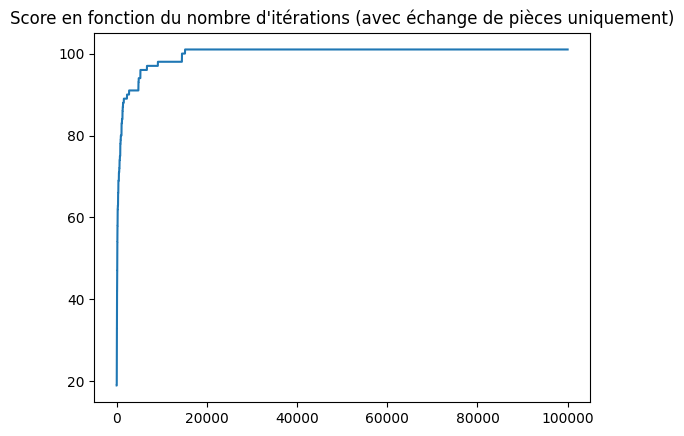

[[[[3, 3], [2, 0, 0, 4]],
  [[33, 2], [11, 4, 0, 4]],
  [[23, 2], [11, 4, 0, 3]],
  [[22, 2], [10, 3, 0, 3]],
  [[27, 2], [14, 3, 0, 3]],
  [[29, 2], [7, 3, 0, 4]],
  [[15, 2], [9, 4, 0, 2]],
  [[35, 2], [14, 2, 0, 4]],
  [[14, 2], [7, 4, 0, 2]],
  [[0, 2], [1, 2, 0, 0]]],
 [[[16, 3], [3, 0, 2, 10]],
  [[82, 0], [8, 10, 11, 13]],
  [[70, 0], [6, 13, 11, 10]],
  [[83, 0], [8, 11, 10, 9]],
  [[78, 0], [7, 9, 11, 13]],
  [[66, 0], [6, 9, 9, 8]],
  [[76, 0], [7, 8, 9, 8]],
  [[48, 0], [5, 8, 14, 6]],
  [[38, 0], [5, 6, 7, 10]],
  [[19, 1], [3, 6, 1, 0]]],
 [[[25, 3], [1, 0, 3, 13]],
  [[91, 0], [9, 9, 12, 13]],
  [[40, 0], [5, 6, 12, 12]],
  [[65, 0], [6, 8, 11, 12]],
  [[75, 0], [7, 8, 7, 14]],
  [[36, 0], [5, 5, 10, 11]],
  [[97, 0], [10, 11, 13, 14]],
  [[42, 0], [5, 7, 5, 10]],
  [[52, 0], [5, 10, 13, 8]],
  [[10, 1], [1, 10, 3, 0]]],
 [[[7, 3], [1, 0, 1, 8]],
  [[46, 0], [5, 8, 9, 7]],
  [[37, 0], [5, 6, 5, 14]],
  [[58, 0], [5, 14, 6, 13]],
  [[94, 0], [9, 13, 12, 14]],
  [[50, 0], [

In [56]:
#Expérience 2
xp2()

L'expérience 2 se déroule de la manière suivante: \
A chaque itération, on échange 2 pièces du puzzle initial, dont on a calculé le score, et on calcule le score issu de cette modification. Si celui-ci est supérieur au score initial, on enregistre le nouveau puzzle.\
A priori, grâce à ce procédé, le score ne peut qu'augmenter. On constate que c'est effectivement le cas ici. Seulement, on constate aussi que le score finit par stagner. C'est le risque de cette méthode: arriver à une solution du puzzle correspondant à un minimum local.

A ce stade, deux choses sont à noter: \
- la modification consiste seulement en l'échange de pièces. Les pièces centrales ne subissent aucune rotation, ce qui permettrait sûrement d'améliorer encore le score. (Vous pouvez le vérifier: le puzzle est une liste de listes, constituées elles-même de listes représentant les pièces de la manière suivante: \
[(index de la pièce dans la grande liste de pièces, rotation subie par cette pièce), [4 chiffres constituant la pièce]])
- L'échange de pièces se fait de manière aléatoire entre une pièce de "coin", de "bord" ou centrale. Or, plus le nombre de pièces total augmente, plus il y a de pièces de "bord", et encore plus il y a de pièces centrales. Ainsi, pour un grand nombre de pièces, il est peut-être intéressant d'échanger plus souvent des pièces centrales ou de "bord" que des pièces de "coin".

In [ ]:
def xp3():
  
  pieces_to_swap = ["corner", "edge", "other"]
  for piece_to_swap in pieces_to_swap:
    init_puzzle = copy.deepcopy(p)
    init_score = match(p)
    abs, ord = [], []
    for i in range (itr):
      abs.append(i)
      ord.append(init_score)
      swapped_puzzle = swap_2(piece_to_swap, copy.deepcopy(init_puzzle))
      swapped_score = match(swapped_puzzle)
      if swapped_score>init_score:
        init_puzzle = swapped_puzzle
        init_score = swapped_score

    max_reached = max(ord)
    max_possible = len(p)*(len(p)-1) + len(p[0])*(len(p[0])-1)

    print(f"Type de pièces échangé: {piece_to_swap}")
    print(f"Score maximal atteint: {max_reached}")
    print(f"Score maximal possible: {max_possible}")
    print(f"On en déduit que {100*max_reached/max_possible}% des pièces sont correctement placées")
    print()
    plt.plot(abs, ord, label = piece_to_swap)

  plt.title("Score en fonction du nombre d'itérations (avec échange d'un seul type de pièces uniquement)")
  plt.legend()
  plt.show()

In [ ]:
#Expérience 3
#xp3()

L'expérience 3 cherche à mesurer l'évolution du score selon le type de pièces échangé. \
On essaie tout d'abord de n'échanger que des pièces de "coin", puis que des pièces de "bord" et enfin, que des pièces centrales. \
On constate que l'échange unique de pièces centrales permet d'améliorer le score de façon significative, lorsqu'elles sont bien sûr en majorité dans le puzzle. L'échange de pièces de "bord" permet d'améliorer le score dans une moindre mesure. Par contre, l'échange unique de pièces de "coin" améliore très rarement le score. \
On peut donc optimiser l'algorithme précédent en échangeant plus fréquemment des pièces de "bord" ou centrales que des "coins". \
Or, l'expérience précédente montre qu'une bonne combinaison des types de pièces échangés permet d'aboutir à un score très satisfaisant en beaucoup moins d'itérations. \
Ainsi, il faut veiller à garder un équilibre entre l'échange de ces 2 types de pièces.

In [ ]:
def xp3bis():

  init_puzzle = copy.deepcopy(p)
  init_score = match(p)
  abs, ord = [], []
  for i in range (itr):
    abs.append(i)
    ord.append(init_score)
    swapped_puzzle = swap_1(copy.deepcopy(init_puzzle))
    swapped_score = match(swapped_puzzle)
    if swapped_score>init_score:
      init_puzzle = swapped_puzzle
      init_score = swapped_score
  
  max_reached = max(ord)
  max_possible = len(p)*(len(p)-1) + len(p[0])*(len(p[0])-1)

  print(f"Echange équiprobable des pièces")
  print(f"Score maximal atteint: {max_reached}")
  print(f"Score maximal possible: {max_possible}")
  print(f"On en déduit que {100*max_reached/max_possible}% des pièces sont correctement placées")
  print()
  plt.plot(abs, ord)

  init_puzzle = copy.deepcopy(p)
  init_score = match(p)
  abs, ord = [], []
  for i in range (itr):
    abs.append(i)
    ord.append(init_score)
    swapped_puzzle = swap_3(copy.deepcopy(init_puzzle))
    swapped_score = match(swapped_puzzle)
    if swapped_score>init_score:
      init_puzzle = swapped_puzzle
      init_score = swapped_score
  
  max_reached = max(ord)
  max_possible = len(p)*(len(p)-1) + len(p[0])*(len(p[0])-1)

  print("Echange plus fréquent des types 'edge' et 'other'")
  print(f"Score maximal atteint: {max_reached}")
  print(f"Score maximal possible: {max_possible}")
  print(f"On en déduit que {100*max_reached/max_possible}% des pièces sont correctement placées")
  plt.plot(abs, ord)

  plt.show()

In [ ]:
# Expérience 3bis (modification suite aux conclusions de l'expérience précédente)
#xp3bis()

A présent, ajoutons une modification supplémentaire: la rotation des pièces centrales. \
Je vais l'ajouter de la manière suivante: si le nouveau score est identique ou inférieur au précédent, c'est-à-dire si le score n'a pas évolué ou a diminué entre 2 itérations, je sélectionne une pièce centrale au hasard dans le puzzle et je la tourne au maximum 4 fois. Si, le score n'a toujours pas été amélioré, j'en sélectionne une autre.

In [ ]:
def xp4():
  
  init_puzzle = copy.deepcopy(p)
  pieces_number = len(init_puzzle)*len(init_puzzle[0])
  edges_number = 2*(len(init_puzzle)+len(init_puzzle[0])-4)
  others_number = pieces_number-edges_number-4
  mutation_rate = int(0.1*others_number)
  init_score = match(p)
  abs, ord = [], []
  for i in range (itr):
    abs.append(i)
    ord.append(init_score)
    swapped_puzzle = swap_1(copy.deepcopy(init_puzzle))
    swapped_score = match(swapped_puzzle)
    if swapped_score>init_score:
      init_puzzle = swapped_puzzle
      init_score = swapped_score
    else:
      rotated_puzzle = copy.deepcopy(swapped_puzzle)
      j, k = random.randint(1, len(p)-2), random.randint(1, len(p[0])-2)
      piece_to_rotate = rotated_puzzle[j][k]
      for angle in range (4):
        rotated_piece = [[piece_to_rotate[0][0], piece_to_rotate[0][1] + angle], rotate(piece_to_rotate[1], angle)]
        rotated_puzzle[j][k] = rotated_piece
        rotated_score = match(rotated_puzzle)
        if rotated_score>swapped_score:
          swapped_puzzle = rotated_puzzle
          swapped_score = rotated_score

  max_reached = max(ord)
  max_possible = len(p)*(len(p)-1) + len(p[0])*(len(p[0])-1)

  print(f"Score maximal atteint: {max_reached}")
  print(f"Score maximal possible: {max_possible}")
  print(f"On en déduit que {100*max_reached/max_possible}% des pièces sont correctement placées")
  plt.plot(abs, ord)
  plt.title("Score en fonction du nombre d'itérations (avec échange et rotation des pièces)")
  plt.show()

In [ ]:
#Expérience 4
#xp4()

En comparaison avec la deuxième expérience, on constate que la différence de score n'est pas significative. \
De plus, on constate que cette expérience s'exécute en un temps largement plus considérable.

Essayons l'expérience suivante, issue de la 2ème: \
Pour un nombre d'itérations donné, on effectue des changements de pièces. Puis, pour la meilleure solution obtenue, on réalise des permutations sur l'ensemble des pièces centrales du puzzle.

In [ ]:
def xp5():

  init_puzzle = copy.deepcopy(p)
  init_score = match(p)
  abs, ord = [], []
  for i in range (itr):
    abs.append(i)
    ord.append(init_score)
    swapped_puzzle = swap_1(copy.deepcopy(init_puzzle))
    swapped_score = match(swapped_puzzle)
    if swapped_score>init_score:
      init_puzzle = swapped_puzzle
      init_score = swapped_score
  count = itr-1
  rotated_puzzle = copy.deepcopy(init_puzzle)
  for j in range(1, len(init_puzzle)-1):
    count += j
    for k in range(1, len(init_puzzle[0])-1):
      count += k-1
      abs.append(count)
      piece_to_rotate = rotated_puzzle[j][k]
      for angle in range (4):
        rotated_piece = [[piece_to_rotate[0][0], piece_to_rotate[0][1] + angle], rotate(piece_to_rotate[1], angle)]
        rotated_puzzle[j][k] = rotated_piece
        rotated_score = match(rotated_puzzle)
        if rotated_score>init_score:
            init_puzzle = rotated_puzzle
            init_score = rotated_score
        else:
          rotated_puzzle = copy.deepcopy(init_puzzle)
      ord.append(init_score)

  max_reached = max(ord)
  max_possible = len(p)*(len(p)-1) + len(p[0])*(len(p[0])-1)

  print(f"Score maximal atteint: {max_reached}")
  print(f"Score maximal possible: {max_possible}")
  print(f"On en déduit que {100*max_reached/max_possible}% des pièces sont correctement placées")

  plt.plot(abs, ord)
  plt.title("Score en fonction du nombre d'itérations (avec échange de pièces puis rotation)")
  plt.show()

Score maximal atteint: 247
Score maximal possible: 480
On en déduit que 51.458333333333336% des pièces sont correctement placées


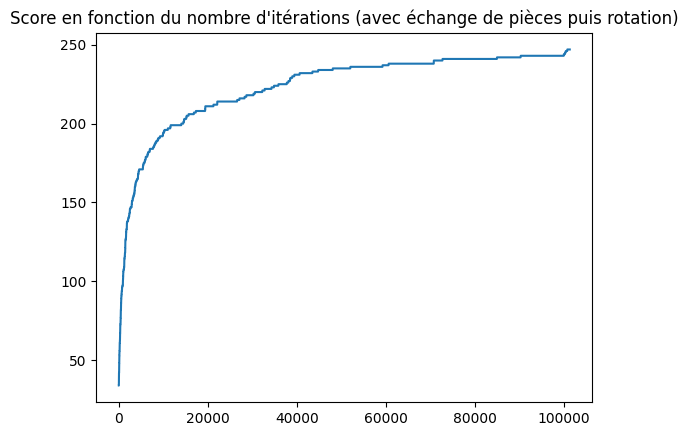

In [ ]:
#Expérience 5
xp5()

En comparant avec l'expérience 2, on constate que l'évolution du score n'est pas significative. Toutefois, les rotations permettent d'améliorer le score à chaque fois sans exiger tant de temps.

Conclusion: J'ai utilisé un algorithme de type recherche locale hybride. \
Seulement, ma recherche locale n'est pas définie selon un voisinage de pièces mais selon leurs catégories. Cette approche me permet d'obtenir de bons résultats.\
Pour essayer de les améliorer encore un peu, j'ai ajouté des rotations une fois le meilleur puzzle obtenu. Encore une fois, le score s'en trouve améliorer, même si c'est de peu. \
Puisque ces résultats sont obtenus dans un temps très satisfaisant (pour 100 000 itérations, j'obtiens en moyenne des scores supérieurs à 240 en 4 minutes). On pourrait alors imaginer répéter cet algorithme plusieurs fois de manière à générer des puzzles parents, puis implémenter un algorithme génétique avec des croisements et des mutations permettant certainement d'améliorer davantage le score. 


In [ ]:
def xp_final():

  init_puzzle = copy.deepcopy(p)
  init_score = match(p)
  abs, ord = [], []
  for i in range (itr):
    abs.append(i)
    ord.append(init_score)
    swapped_puzzle = swap_1(copy.deepcopy(init_puzzle))
    swapped_score = match(swapped_puzzle)
    if swapped_score>init_score:
      init_puzzle = swapped_puzzle
      init_score = swapped_score
  count = itr-1
  rotated_puzzle = copy.deepcopy(init_puzzle)
  for j in range(1, len(init_puzzle)-1):
    count += j
    for k in range(1, len(init_puzzle[0])-1):
      count += k-1
      abs.append(count)
      piece_to_rotate = rotated_puzzle[j][k]
      for angle in range (4):
        rotated_piece = [[piece_to_rotate[0][0], piece_to_rotate[0][1] + angle], rotate(piece_to_rotate[1], angle)]
        rotated_puzzle[j][k] = rotated_piece
        rotated_score = match(rotated_puzzle)
        if rotated_score>init_score:
            init_puzzle = rotated_puzzle
            init_score = rotated_score
        else:
          rotated_puzzle = copy.deepcopy(init_puzzle)
      ord.append(init_score)
  return init_puzzle

In [ ]:
final_puzzle = xp_final()

In [ ]:
print(match(final_puzzle))

234


In [ ]:
with open("eternity_wissemberg_paul.txt", "w") as file:
    count = 0
    for i in range (len(final_puzzle)):
        for j in range (len(final_puzzle[i])):
            if count<10:
                piece_number = "00"+str(count)
            elif count>=10 and count<100:
                piece_number = "0"+str(count)
            else:
                piece_number = str(count)
            count += 1
            piece_idx = str(final_puzzle[i][j][0][0])
            piece_rotation = str(final_puzzle[i][j][0][1])
            file.write(piece_number + " -> " + piece_idx + " " + piece_rotation + "\n")

In [ ]:
def features(file):
  with open(file, "r") as f:
      pieces = [line.split() for line in f]
  #Convert str to int
  for piece in pieces:
    for i in range(len(piece)):
      piece[i] = int(piece[i])
  rows, columns = pieces.pop(0)
  return (rows, columns, pieces)


def categories(pieces):
  corners, edges, others = [], [], []
  for piece in pieces:
    count = 0
    for i in range(len(piece)):
      if piece[i] == 0:
        count += 1
    if count == 2:
      corners.append(piece)
    elif count == 1:
      edges.append(piece)
    else:
      others.append(piece)
  return (corners, edges, others)


def rotate(piece, angle):
  rotated_piece = []
  for i in range(angle, len(piece)+angle):
    if i%(len(piece)) == 0:
      rotated_piece.append(piece[0])
    elif i%(len(piece)) == 1:
      rotated_piece.append(piece[1])
    elif i%(len(piece)) == 2:
      rotated_piece.append(piece[2])
    elif i%(len(piece)) == 3:
      rotated_piece.append(piece[3])
  return rotated_piece


def correct(piece, row, column):
  angle = 0
  if row == 0:
    if column == 0:  #top left
      while (piece[1] != 0) or (piece[2] != 0):
        angle += 1
        piece = rotate(piece, 1)
    elif column == puzzle_height-1:  #top right
      while (piece[2] != 0) or (piece[3] != 0):
        angle += 1
        piece = rotate(piece, 1)
    else: #top edges
      while piece[2] != 0:
        angle += 1
        piece = rotate(piece, 1)
  elif row == puzzle_width-1:
    if column == 0:  #bottom left
      while (piece[0] != 0) or (piece[1] != 0):
        angle += 1
        piece = rotate(piece, 1)
    elif column == puzzle_height-1:  #bottom right
      while (piece[0] != 0) or (piece[3] != 0):
        angle += 1
        piece = rotate(piece, 1)
    else: #bottom edges
      while piece[0] != 0:
        angle += 1
        piece = rotate(piece, 1)
  else:
    if column == 0: #left edges
      while piece[1] != 0:
        angle += 1
        piece = rotate(piece, 1)
    elif column == puzzle_height-1: #right edges
      while piece[3] != 0:
        angle += 1
        piece = rotate(piece, 1)
  #Add the index of the piece
  initial_piece = rotate(piece, len(piece)-angle)
  piece_idx = puzzle_pieces.index(initial_piece)
  return [[piece_idx, angle], piece]


def build():
  puzzle = []
  for i in range (puzzle_width):
    sub_puzzle = []
    for j in range (puzzle_height):
      if (i == 0 or i == puzzle_width-1):
        if (j == 0 or j == puzzle_height-1):
          sub_puzzle.append(correct(puzzle_corners.pop(random.randint(0, len(puzzle_corners)-1)), i, j))
        else:
          sub_puzzle.append(correct(puzzle_edges.pop(random.randint(0, len(puzzle_edges)-1)), i, j))
      elif (j == 0 or j == puzzle_height-1):
        sub_puzzle.append(correct(puzzle_edges.pop(random.randint(0, len(puzzle_edges)-1)), i, j))
      else:
        sub_puzzle.append(correct(puzzle_others.pop(random.randint(0, len(puzzle_others)-1)), i, j))
    puzzle.append(sub_puzzle)
  return puzzle


def match(puzzle):
  score = 0
  for i in range (len(puzzle)):
    for j in range (len(puzzle[i])-1):
      #print(puzzle[i][j][1], puzzle[i][j+1][1], (puzzle[i][j][1][3], puzzle[i][j+1][1][1]))
      if puzzle[i][j][1][3] == puzzle[i][j+1][1][1]:
        score += 1
  #print()
  for i in range (len(puzzle)-1):
    for j in range (len(puzzle[i])):
      #print(puzzle[i][j][1], puzzle[i+1][j][1], (puzzle[i][j][1][0], puzzle[i+1][j][1][2]))
      if puzzle[i][j][1][0] == puzzle[i+1][j][1][2]:
        score += 1
  return score


def swap_1(puzzle):

  piece_to_swap = random.choice(["corner", "edge", "other"])

  if piece_to_swap == "corner":
    i1, j1 = random.choice([0, len(puzzle)-1]), random.choice([0, len(puzzle[0])-1])
    i2, j2 = random.choice([0, len(puzzle)-1]), random.choice([0, len(puzzle[0])-1])
    while i2 == i1 and j2 == j1:
      i2, j2 = random.choice([0, len(puzzle)-1]), random.choice([0, len(puzzle[0])-1])


  elif piece_to_swap == "edge":
    
    i1 = random.randint(0, len(puzzle)-1)
    if i1 == 0 or i1 == len(puzzle)-1:
      j1 = random.randint(1, len(puzzle[0])-2)
    else:
      j1 = random.choice([0, len(puzzle[0])-1])
    
    i2 = random.randint(0, len(puzzle)-1)
    if i2 == 0 or i2 == len(puzzle)-1:
      j2 = random.randint(1, len(puzzle[0])-2)
    else:
      j2 = random.choice([0, len(puzzle[0])-1])
    while i2 == i1 and j2 == j1:
      i2 = random.randint(0, len(puzzle)-1)
      if i2 == 0 or i2 == len(puzzle)-1:
        j2 = random.randint(1, len(puzzle[0])-2)
      else:
        j2 = random.choice([0, len(puzzle[0])-1])


  else:
    i1, j1 = random.randint(1, len(puzzle)-2), random.randint(1, len(puzzle[0])-2)
    i2, j2 = random.randint(1, len(puzzle)-2), random.randint(1, len(puzzle[0])-2)
    while i2 == i1 and j2 == j1:
      i2, j2 = random.randint(1, len(puzzle)-2), random.randint(1, len(puzzle[0])-2)

  piece1, piece2 = puzzle[i1][j1], puzzle[i2][j2]
  puzzle[i1][j1], puzzle[i2][j2] = correct(rotate(piece2[1], 4-piece2[0][1]), i1, j1), correct(rotate(piece1[1], 4-piece1[0][1]), i2, j2)

  return puzzle


def xp2():

  init_puzzle = copy.deepcopy(p)
  init_score = match(p)
  abs, ord = [], []
  for i in range (itr):
    abs.append(i)
    ord.append(init_score)
    swapped_puzzle = swap_1(copy.deepcopy(init_puzzle))
    swapped_score = match(swapped_puzzle)
    if swapped_score>init_score:
      init_puzzle = swapped_puzzle
      init_score = swapped_score
  
  max_reached = max(ord)
  max_possible = len(p)*(len(p)-1) + len(p[0])*(len(p[0])-1)

  print(f"Score maximal atteint: {max_reached}")
  print(f"Score maximal possible: {max_possible}")
  print(f"On en déduit que {100*max_reached/max_possible}% des pièces sont correctement placées")
  plt.plot(abs, ord)
  plt.title("Score en fonction du nombre d'itérations (avec échange de pièces uniquement)")
  plt.show()